# Comprehensive Machine Learning Models Comparison
## Breast Cancer Classification with Model Persistence

This notebook provides a comprehensive comparison of multiple machine learning algorithms for breast cancer classification using the Wisconsin Breast Cancer dataset. It includes:

- **Shared Data Processing Pipeline**: Consistent data preprocessing for all models
- **Multiple ML Algorithms**: Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest
- **Model Persistence**: Save/Load functionality for trained models
- **Comprehensive Evaluation**: Performance metrics, visualizations, and cross-validation
- **Hyperparameter Tuning**: Optimization for best performing models
- **Feature Analysis**: Importance analysis and model interpretability

**Maintainable Code Structure**: All models use the same preprocessing pipeline and evaluation framework to ensure consistency and reduce code duplication.

## 1. Import Required Libraries

In [1]:
# Import our custom modules
from data_processor import load_and_explore_data, preprocess_data
from model_trainer import train_and_evaluate_model, analyze_feature_importance, optimize_knn_k
from visualizer import (plot_confusion_matrix, plot_decision_boundary, plot_feature_importance,
                        plot_knn_analysis, plot_svm_comparison, plot_tree_models_comparison)
from model_persistence import save_model, load_model, save_all_models, load_model_by_name
from model_comparison import (create_comparison_dataframe, display_detailed_comparison,
                            plot_comprehensive_comparison, generate_model_summary_report,
                            create_performance_radar_chart)

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("All modules imported successfully!")

All modules imported successfully!


## 2. Data Loading and Exploration

In [2]:
# Load and explore the dataset
dataset_path = "../Dataset/breast_cancer_wisconsin.csv"
dataset, feature_names = load_and_explore_data(dataset_path)

print("✅ Data loaded and explored successfully!")
print(f"Dataset shape: {dataset.shape}")
print(f"Number of features: {len(feature_names)}")
print(f"Number of samples: {dataset.shape[0]}")

Dataset Information:
Dataset shape: (699, 10)
Number of features: 8
Number of samples: 699

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB

First 5 rows:
   Clump_thickness  Uniform

## 3. Data Preprocessing Pipeline

In this project feature scaling only applies to the features
- The model dont care the output is 0 or 1, just 2 or 4

In [3]:
# Preprocess data using our module
X_train, X_test, y_train, y_test, scaler = preprocess_data(dataset, feature_names)

print("✅ Data preprocessing completed successfully!")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Number of features: {len(feature_names)}")

Number of null data after processing:
__________________________
Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Declaring features and dependent variables...
On the features, remove the 'Sample code number' because it is not relevant to the prediction
Features (X) shape: (683, 8)
Target (y) shape: (683,)

Splitting the dataset into Training set and Test set...
DataSet Splitting:
_______________________________
X_train:  4368
X_test:  1096
y_train: 546
y_test 137

Feature Scaling...
Feature Scaling Applied Successfully!
_____________________________________
X_train shape: (546, 8)
X_test shape: (137, 8)

Training set - First 5 samples after scaling:
array([[-0.69781134, -0.74152574, -0.63363747,

## 4. Model Training and Evaluation Framework

In [4]:
# Initialize results storage
model_results = {}
all_models = {}

print("✅ Model training framework ready!")
print("Using functions from model_trainer.py:")
print("- train_and_evaluate_model(): Train and evaluate any model")
print("Using functions from visualizer.py:")  
print("- plot_confusion_matrix(): Visualize confusion matrix")
print("- plot_decision_boundary(): Show decision boundary")
print("Storage:")
print("- model_results: Dictionary to store all results")
print("- all_models: Dictionary to store trained models")

✅ Model training framework ready!
Using functions from model_trainer.py:
- train_and_evaluate_model(): Train and evaluate any model
Using functions from visualizer.py:
- plot_confusion_matrix(): Visualize confusion matrix
- plot_decision_boundary(): Show decision boundary
Storage:
- model_results: Dictionary to store all results
- all_models: Dictionary to store trained models


## 5. Logistic Regression Implementation

In [6]:
training_logistic_regression = 1
if training_logistic_regression == 1:
    # Create and train Logistic Regression model
    logistic_model = LogisticRegression(random_state=0)
    lr_results = train_and_evaluate_model(
        logistic_model, "Logistic Regression", 
        X_train, X_test, y_train, y_test
    )

    # Store results
    model_results['Logistic Regression'] = lr_results
    all_models['Logistic Regression'] = logistic_model


Training and Evaluating: Logistic Regression
Training Time: 0.0248 seconds
Prediction Time: 0.0024 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9492
Recall: 0.9489
F1-Score: 0.9490
ROC AUC: 0.9929
Overfitting: 0.0218

Confusion Matrix:
[[83  4]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.95      0.96        87
           4       0.92      0.94      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



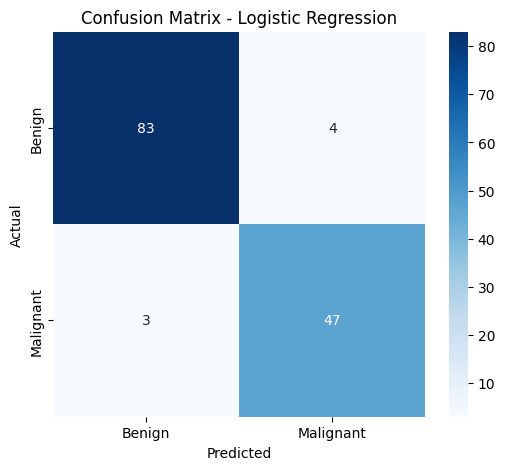

Plotted 357 points for class 2
Plotted 189 points for class 4


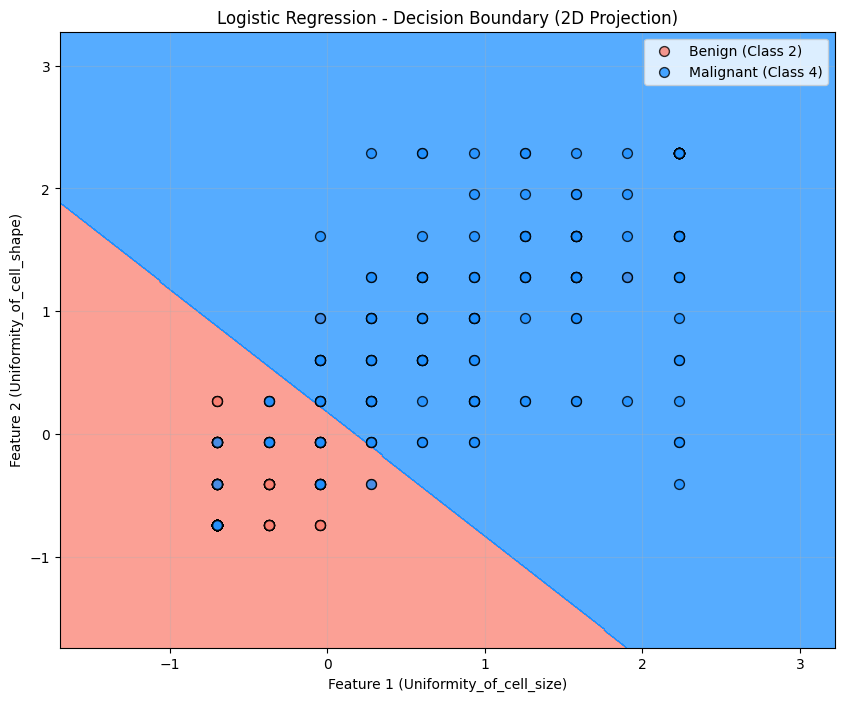

In [19]:
# Visualize Logistic Regression results using our modules
plot_confusion_matrix(lr_results, figsize=(6, 5))
plot_decision_boundary(logistic_model, "Logistic Regression", X_train, y_train, feature_names)


Logistic Regression Feature Importance Analysis:
Top 5 Important Features (by absolute coefficient):
1. Bare_nuclei              :   1.4235 (|1.4235|)
2. Bland_chromatin          :   1.0878 (|1.0878|)
3. Uniformity_of_cell_shape :   0.9193 (|0.9193|)
4. Normal_nucleoli          :   0.8379 (|0.8379|)
5. Mitoses                  :   0.7110 (|0.7110|)


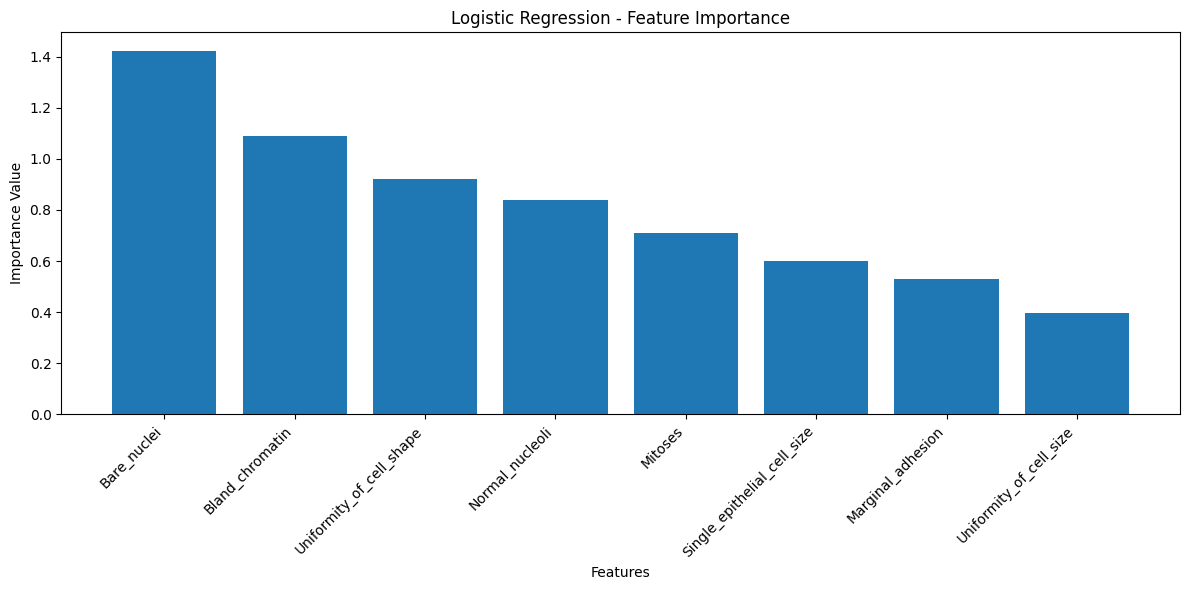


Logistic Regression Summary:
✓ Test Accuracy: 0.9489
✓ F1-Score: 0.9490
✓ Training Time: 0.0349s
✓ Overfitting: 0.0218


In [7]:
# Analyze feature importance using our module
feature_importance_lr = analyze_feature_importance(logistic_model, feature_names, 'Logistic Regression')

# Plot feature importance using our module
plot_feature_importance(feature_importance_lr, 'Logistic Regression', figsize=(12, 6))

print(f"\nLogistic Regression Summary:")
print(f"✓ Test Accuracy: {lr_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {lr_results['f1_score']:.4f}")
print(f"✓ Training Time: {lr_results['training_time']:.4f}s")
print(f"✓ Overfitting: {lr_results['overfitting']:.4f}")

## 6. K-Nearest Neighbors Implementation

In [7]:
# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=30, metric='minkowski', p=2)
knn_results = train_and_evaluate_model(
    knn_model, "K-Nearest Neighbors", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['KNN'] = knn_results
all_models['KNN'] = knn_model


Training and Evaluating: K-Nearest Neighbors
Training Time: 0.0091 seconds
Prediction Time: 0.0974 seconds
Training Accuracy: 0.9670
Test Accuracy: 0.9416
Precision: 0.9415
Recall: 0.9416
F1-Score: 0.9413
ROC AUC: 0.9930
Overfitting: 0.0254

Confusion Matrix:
[[84  3]
 [ 5 45]]

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.97      0.95        87
           4       0.94      0.90      0.92        50

    accuracy                           0.94       137
   macro avg       0.94      0.93      0.94       137
weighted avg       0.94      0.94      0.94       137



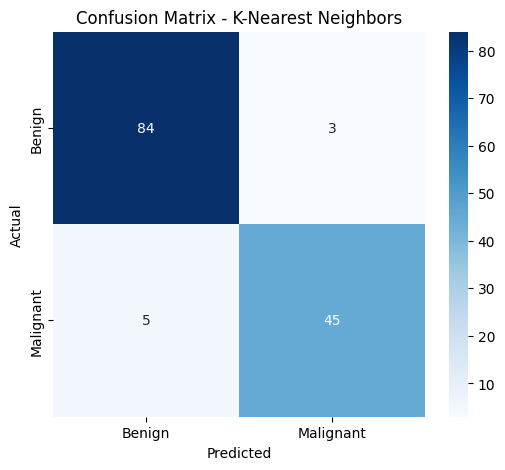

Plotted 357 points for class 2
Plotted 189 points for class 4


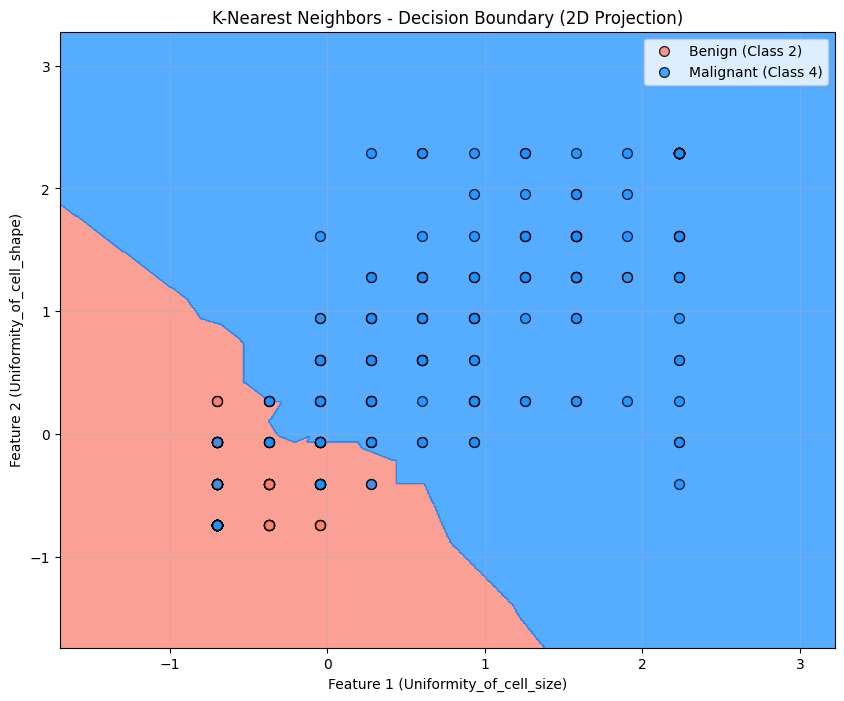

In [16]:
plot_confusion_matrix(knn_results, figsize=(6, 5))
plot_decision_boundary(knn_model, "K-Nearest Neighbors", X_train, y_train, feature_names)

In [17]:
# KNN K-value optimization using our module
k_results, optimal_k = optimize_knn_k(X_train, X_test, y_train, y_test)


K-value Optimization:
k= 3: Train=0.9670, Test=0.9489, Overfitting=0.0181
k= 5: Train=0.9707, Test=0.9562, Overfitting=0.0145
k= 7: Train=0.9689, Test=0.9635, Overfitting=0.0054
k= 5: Train=0.9707, Test=0.9562, Overfitting=0.0145
k= 7: Train=0.9689, Test=0.9635, Overfitting=0.0054
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=11: Train=0.9744, Test=0.9562, Overfitting=0.0182
k=15: Train=0.9670, Test=0.9416, Overfitting=0.0254
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)
k=21: Train=0.9652, Test=0.9343, Overfitting=0.0309
k=25: Train=0.9652, Test=0.9343, Overfitting=0.0309

Optimal k value: 7 (Test Accuracy: 0.9635)


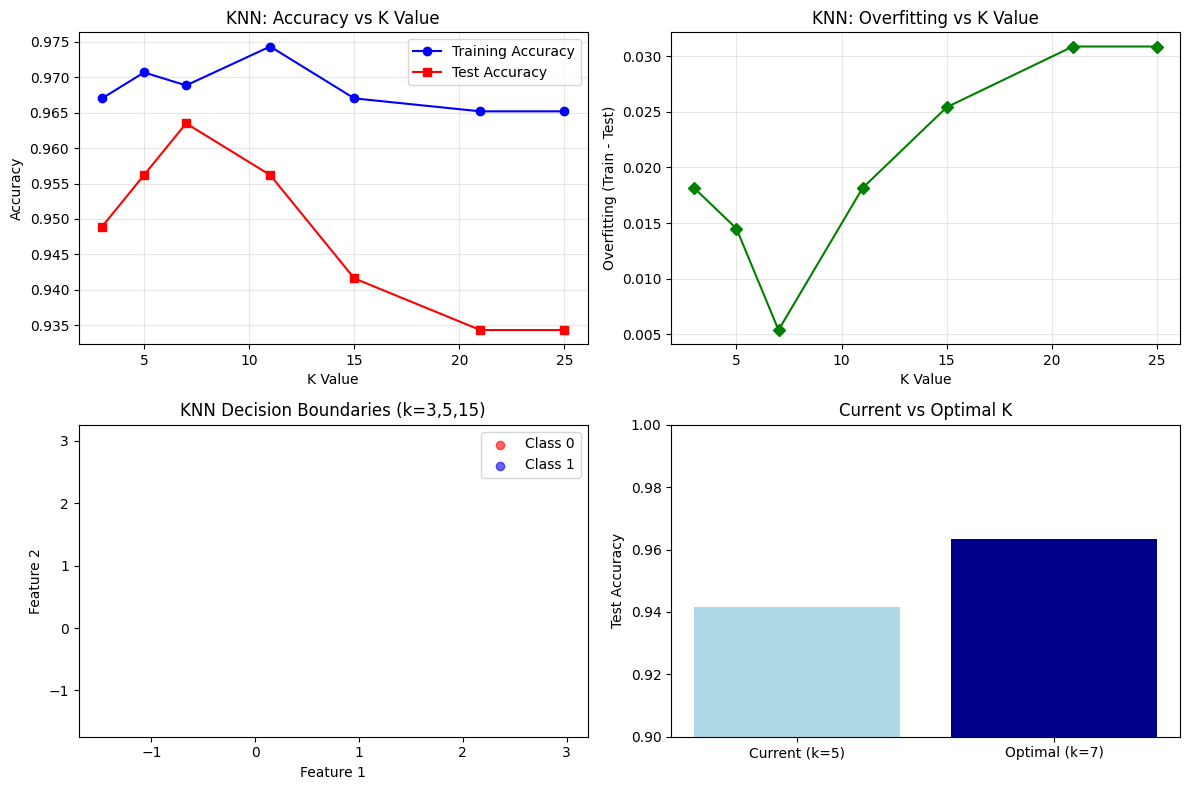


KNN Summary:
✓ Test Accuracy: 0.9416
✓ F1-Score: 0.9413
✓ Training Time: 0.0091s
✓ Overfitting: 0.0254
✓ Optimal K: 7


In [18]:
# Plot KNN analysis using our module
plot_knn_analysis(k_results, knn_results, X_train, y_train, optimal_k)

print(f"\nKNN Summary:")
print(f"✓ Test Accuracy: {knn_results['test_accuracy']:.4f}")
print(f"✓ F1-Score: {knn_results['f1_score']:.4f}")
print(f"✓ Training Time: {knn_results['training_time']:.4f}s")
print(f"✓ Overfitting: {knn_results['overfitting']:.4f}")
print(f"✓ Optimal K: {optimal_k}")

## 7. Support Vector Machine Implementation

In [25]:
# Linear SVM
svm_linear = SVC(kernel='rbf', random_state=0)
svm_linear_results = train_and_evaluate_model(
    svm_linear, "SVM (Linear)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM Linear'] = svm_linear_results
all_models['SVM Linear'] = svm_linear


Training and Evaluating: SVM (Linear)
Training Time: 0.0099 seconds
Prediction Time: 0.0150 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9504
Recall: 0.9489
F1-Score: 0.9492
ROC AUC: 0.9853
Overfitting: 0.0218

Confusion Matrix:
[[82  5]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        87
           4       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
# RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=0)
svm_rbf_results = train_and_evaluate_model(
    svm_rbf, "SVM (RBF)", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['SVM RBF'] = svm_rbf_results
all_models['SVM RBF'] = svm_rbf


Training and Evaluating: SVM (RBF)
Training Time: 0.0099 seconds
Prediction Time: 0.0152 seconds
Training Accuracy: 0.9707
Test Accuracy: 0.9489
Precision: 0.9504
Recall: 0.9489
F1-Score: 0.9492
ROC AUC: 0.9853
Overfitting: 0.0218

Confusion Matrix:
[[82  5]
 [ 2 48]]

Classification Report:
              precision    recall  f1-score   support

           2       0.98      0.94      0.96        87
           4       0.91      0.96      0.93        50

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



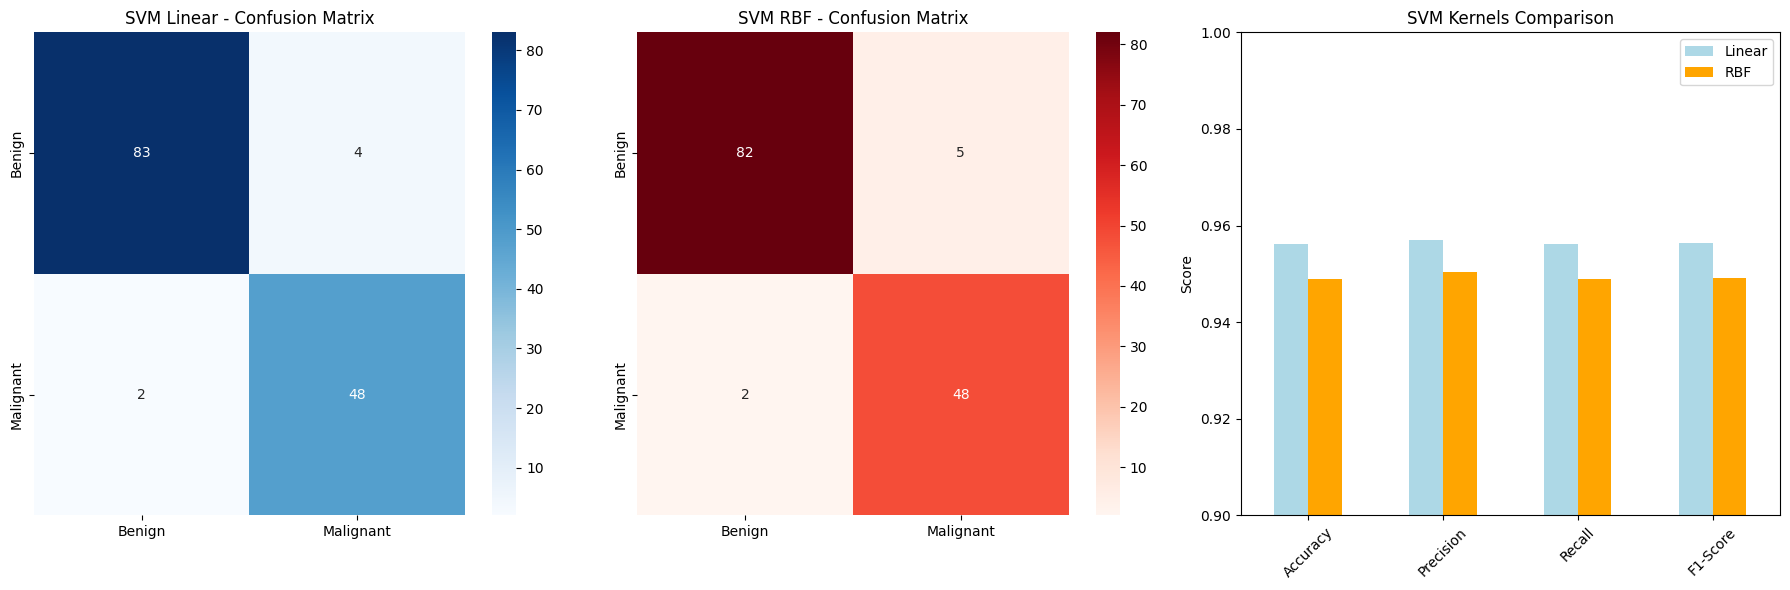

In [22]:
# SVM Models Comparison Visualization using our module
plot_svm_comparison(svm_linear_results, svm_rbf_results)

Plotted 357 points for class 2
Plotted 189 points for class 4


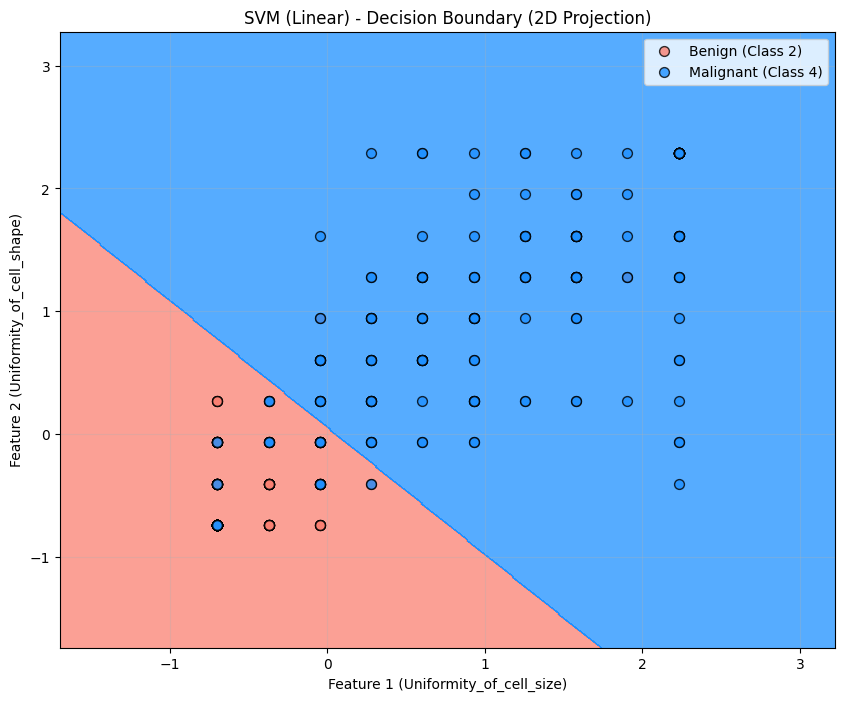

Plotted 357 points for class 2
Plotted 189 points for class 4


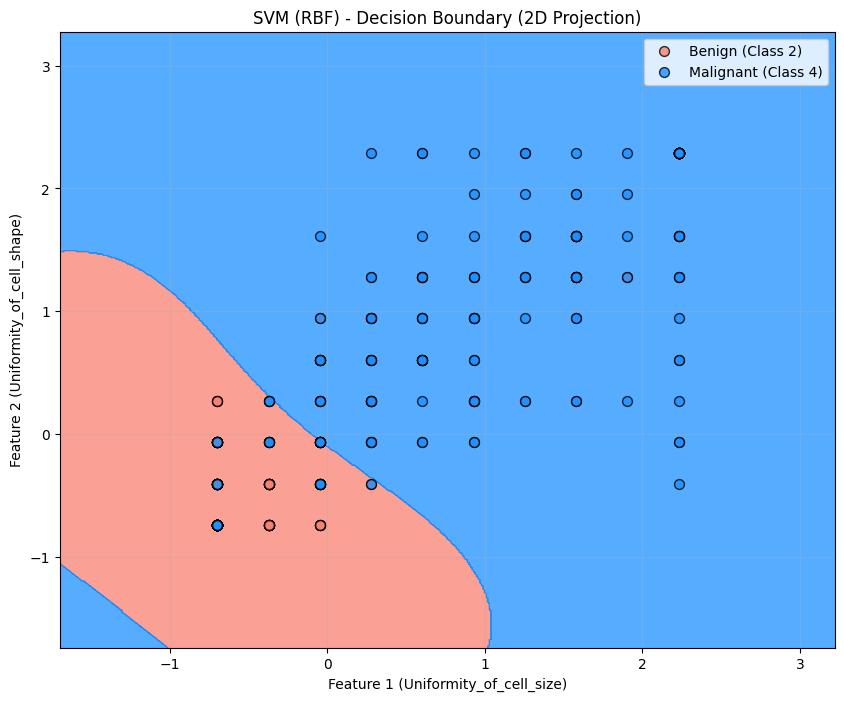


SVM Comparison Summary:
Linear SVM - Test Accuracy: 0.9562
RBF SVM    - Test Accuracy: 0.9489
Linear SVM - Training Time: 0.0105s
RBF SVM    - Training Time: 0.0099s


In [23]:
# SVM Decision Boundaries using our module  
plot_decision_boundary(svm_linear, "SVM (Linear)", X_train, y_train, feature_names)
plot_decision_boundary(svm_rbf, "SVM (RBF)", X_train, y_train, feature_names)

print(f"\nSVM Comparison Summary:")
print("=" * 30)
print(f"Linear SVM - Test Accuracy: {svm_linear_results['test_accuracy']:.4f}")
print(f"RBF SVM    - Test Accuracy: {svm_rbf_results['test_accuracy']:.4f}")
print(f"Linear SVM - Training Time: {svm_linear_results['training_time']:.4f}s")
print(f"RBF SVM    - Training Time: {svm_rbf_results['training_time']:.4f}s")

## 8. Decision Tree and Random Forest Implementation

In [26]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=10)
dt_results = train_and_evaluate_model(
    dt_model, "Decision Tree", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Decision Tree'] = dt_results
all_models['Decision Tree'] = dt_model


Training and Evaluating: Decision Tree
Training Time: 0.0139 seconds
Prediction Time: 0.0020 seconds
Training Accuracy: 1.0000
Test Accuracy: 0.9562
Precision: 0.9562
Recall: 0.9562
F1-Score: 0.9562
ROC AUC: 0.9528
Overfitting: 0.0438

Confusion Matrix:
[[84  3]
 [ 3 47]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        87
           4       0.94      0.94      0.94        50

    accuracy                           0.96       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



In [31]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_results = train_and_evaluate_model(
    rf_model, "Random Forest", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Random Forest'] = rf_results
all_models['Random Forest'] = rf_model


Training and Evaluating: Random Forest
Training Time: 0.0409 seconds
Prediction Time: 0.0040 seconds
Training Accuracy: 0.9982
Test Accuracy: 0.9708
Precision: 0.9715
Recall: 0.9708
F1-Score: 0.9709
ROC AUC: 0.9930
Overfitting: 0.0274

Confusion Matrix:
[[84  3]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.97      0.98        87
           4       0.94      0.98      0.96        50

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



In [28]:
# Naive Bayes
nb_model = GaussianNB()
nb_results = train_and_evaluate_model(
    nb_model, "Naive Bayes", 
    X_train, X_test, y_train, y_test
)

# Store results
model_results['Naive Bayes'] = nb_results
all_models['Naive Bayes'] = nb_model


Training and Evaluating: Naive Bayes
Training Time: 0.0044 seconds
Prediction Time: 0.0000 seconds
Training Accuracy: 0.9652
Test Accuracy: 0.9416
Precision: 0.9465
Recall: 0.9416
F1-Score: 0.9422
ROC AUC: 0.9720
Overfitting: 0.0236

Confusion Matrix:
[[80  7]
 [ 1 49]]

Classification Report:
              precision    recall  f1-score   support

           2       0.99      0.92      0.95        87
           4       0.88      0.98      0.92        50

    accuracy                           0.94       137
   macro avg       0.93      0.95      0.94       137
weighted avg       0.95      0.94      0.94       137



In [32]:
# Feature Importance Analysis for Tree-based Models using our module
dt_importance = analyze_feature_importance(dt_model, feature_names, 'Decision Tree')
rf_importance = analyze_feature_importance(rf_model, feature_names, 'Random Forest')


Decision Tree Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.7092
2. Bare_nuclei              : 0.1420
3. Normal_nucleoli          : 0.0457
4. Single_epithelial_cell_size: 0.0371
5. Marginal_adhesion        : 0.0256

Random Forest Feature Importance Analysis:
Top 5 Important Features:
1. Uniformity_of_cell_size  : 0.3876
2. Single_epithelial_cell_size: 0.1523
3. Bare_nuclei              : 0.1353
4. Uniformity_of_cell_shape : 0.0913
5. Bland_chromatin          : 0.0912


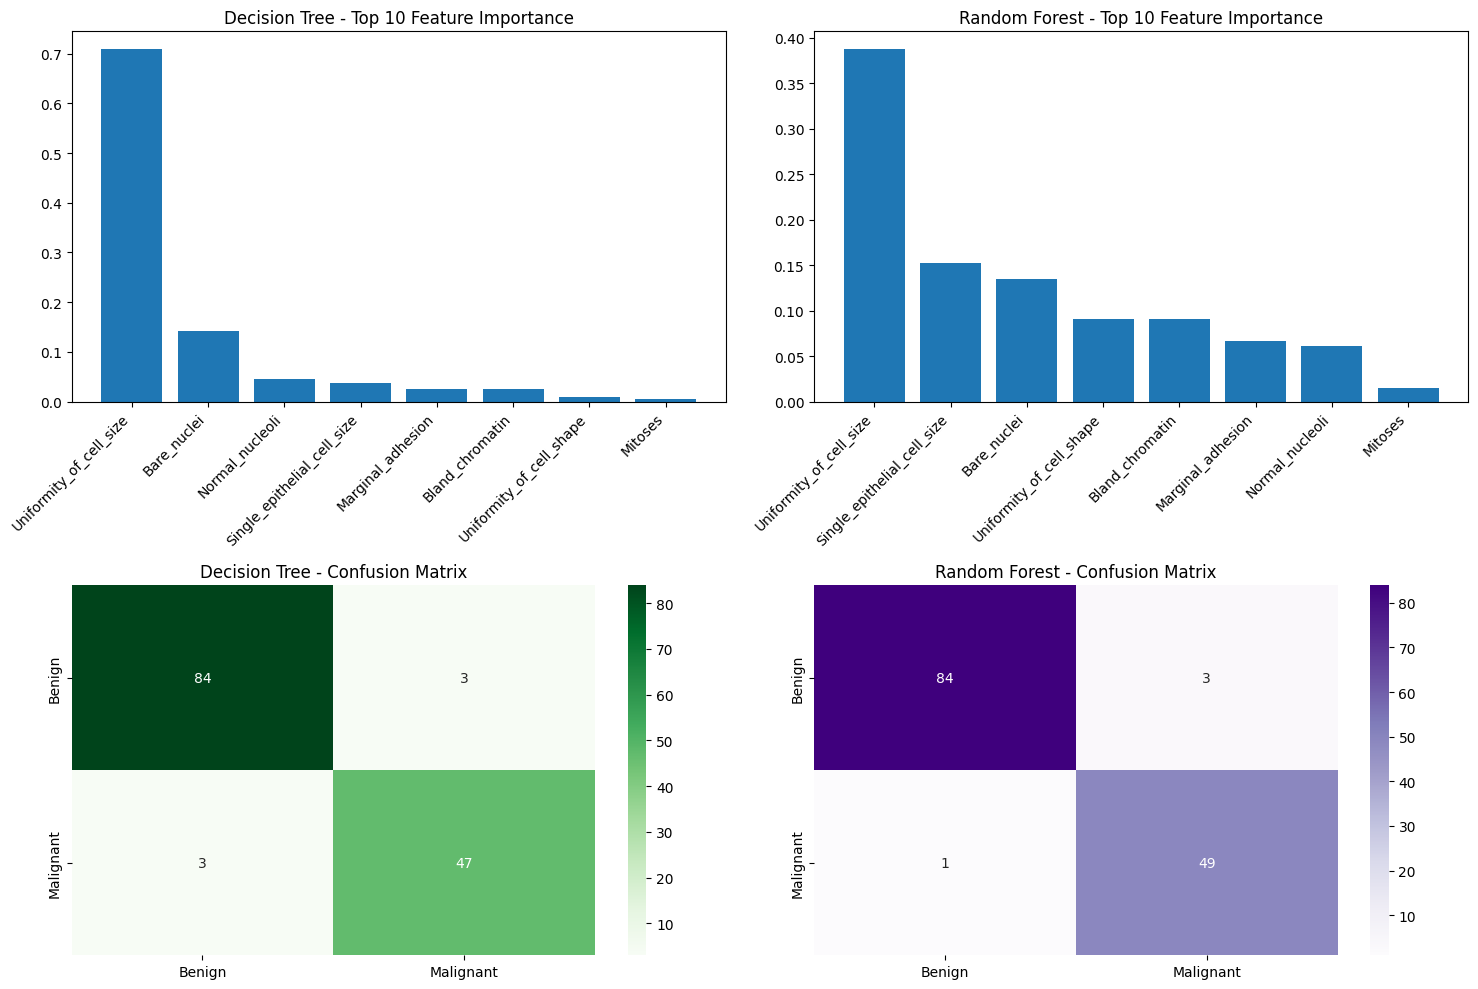


Tree-based Models Summary:
Decision Tree - Test Accuracy: 0.9562
Random Forest - Test Accuracy: 0.9708
Naive Bayes   - Test Accuracy: 0.9416
Decision Tree - Overfitting: 0.0438
Random Forest - Overfitting: 0.0274
Naive Bayes   - Overfitting: 0.0236


In [33]:
# Force reload the visualizer module to get the fix
import importlib
import visualizer
importlib.reload(visualizer)
from visualizer import plot_tree_models_comparison

# Tree Models Visualization using our module
plot_tree_models_comparison(dt_importance, rf_importance, dt_results, rf_results)

print(f"\nTree-based Models Summary:")
print("=" * 35)
print(f"Decision Tree - Test Accuracy: {dt_results['test_accuracy']:.4f}")
print(f"Random Forest - Test Accuracy: {rf_results['test_accuracy']:.4f}")
print(f"Naive Bayes   - Test Accuracy: {nb_results['test_accuracy']:.4f}")
print(f"Decision Tree - Overfitting: {dt_results['overfitting']:.4f}")
print(f"Random Forest - Overfitting: {rf_results['overfitting']:.4f}")
print(f"Naive Bayes   - Overfitting: {nb_results['overfitting']:.4f}")

## 9. Model Persistence (Save/Load Models)

In [34]:
# Debug: Check what models we have
print("Available models in model_results:")
for name in model_results.keys():
    print(f"  - {name}")

print(f"\nAvailable models in all_models:")
for name in all_models.keys():
    print(f"  - {name}")

# Save all trained models using our module
all_results = {}
for model_name, results in model_results.items():
    all_results[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

save_summary = save_all_models(all_results, save_dir="../Models")

print(f"\n✅ All {len(save_summary)} models saved successfully!")
print("Models can be loaded later using model_persistence.load_model()")

Available models in model_results:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes

Available models in all_models:
  - Logistic Regression
  - KNN
  - SVM Linear
  - SVM RBF
  - Decision Tree
  - Random Forest
  - Naive Bayes
💾 Saving all models...
✅ Model saved successfully:
   Model: ../Models\Logistic Regression_20250719_120549.joblib
   Metadata: ../Models\Logistic Regression_20250719_120549_metadata.json
   Test Accuracy: 0.9489
✅ Model saved successfully:
   Model: ../Models\KNN_20250719_120549.joblib
   Metadata: ../Models\KNN_20250719_120549_metadata.json
   Test Accuracy: 0.9416
✅ Model saved successfully:
   Model: ../Models\SVM Linear_20250719_120549.joblib
   Metadata: ../Models\SVM Linear_20250719_120549_metadata.json
   Test Accuracy: 0.9489
✅ Model saved successfully:
   Model: ../Models\SVM RBF_20250719_120549.joblib
   Metadata: ../Models\SVM RBF_20250719_120549_metadata.json
   Test Accuracy: 0.9489
✅ Mod

In [35]:
# Test Model Loading using our module
print(f"\nTesting Model Loading:")
print("=" * 25)

# Load best model (Random Forest) for testing
loaded_model, loaded_metadata = load_model_by_name('Random Forest', save_dir="../Models")

if loaded_model and loaded_metadata:
    print(f"✅ Model loaded successfully!")
    print(f"Model: {loaded_metadata['model_name']}")
    print(f"Test Accuracy: {loaded_metadata['results']['test_accuracy']:.4f}")
else:
    print("❌ No saved model found")

print(f"\n" + "=" * 50)
print("MODEL PERSISTENCE SUMMARY")
print("=" * 50)
print("✅ All models saved with complete metadata")
print("✅ Models can be loaded independently")
print("✅ Easy to use load_model_by_name() function")
print("✅ Model comparison metrics preserved")
print("=" * 50)


Testing Model Loading:
✅ Model loaded successfully: ../Models\Random Forest_20250719_120549.joblib
   Model Name: Random Forest
   Save Date: 2025-07-19T12:05:49.807276
   Test Accuracy: 0.9708029197080292
✅ Model loaded successfully!
Model: Random Forest
Test Accuracy: 0.9708

MODEL PERSISTENCE SUMMARY
✅ All models saved with complete metadata
✅ Models can be loaded independently
✅ Easy to use load_model_by_name() function
✅ Model comparison metrics preserved


## 10. Comprehensive Model Comparison and Analysis

COMPREHENSIVE MODEL COMPARISON


,Model,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score,Training_Time,Overfitting
0,Logistic Regression,0.9707,0.9489,0.9492,0.9489,0.9490,0.0248,0.0218
1,KNN,0.9670,0.9416,0.9415,0.9416,0.9413,0.0091,0.0254
2,SVM Linear,0.9707,0.9489,0.9504,0.9489,0.9492,0.0099,0.0218
3,SVM RBF,0.9707,0.9489,0.9504,0.9489,0.9492,0.0099,0.0218
4,Decision Tree,1.0000,0.9562,0.9562,0.9562,0.9562,0.0139,0.0438
5,Random Forest,0.9982,0.9708,0.9715,0.9708,0.9709,0.0409,0.0274
6,Naive Bayes,0.9652,0.9416,0.9465,0.9416,0.9422,0.0044,0.0236



📋 MODEL ANALYSIS SUMMARY REPORT
Generated on: 2025-07-19 12:07:05
Total Models Evaluated: 7

🏆 BEST OVERALL MODEL: Random Forest
   Test Accuracy: 0.9708
   Precision: 0.9715
   Recall: 0.9708
   F1-Score: 0.9709

📈 PERFORMANCE TIERS:
   Excellent (≥97%): Random Forest
   Good (95-97%): Decision Tree
   Average (<95%): Logistic Regression, KNN, SVM Linear, SVM RBF, Naive Bayes

⚠️  OVERFITTING ANALYSIS:
   No significant overfitting detected in any model

⚡ TRAINING SPEED ANALYSIS:
   Fastest: Naive Bayes (0.0044s)
   Slowest: Random Forest (0.0409s)

💡 RECOMMENDATIONS:
   For Production: Random Forest (Best balance of accuracy and reliability)
   For Real-time Applications: Naive Bayes (Fastest training)
   Most Balanced: Random Forest (Good accuracy with low overfitting)



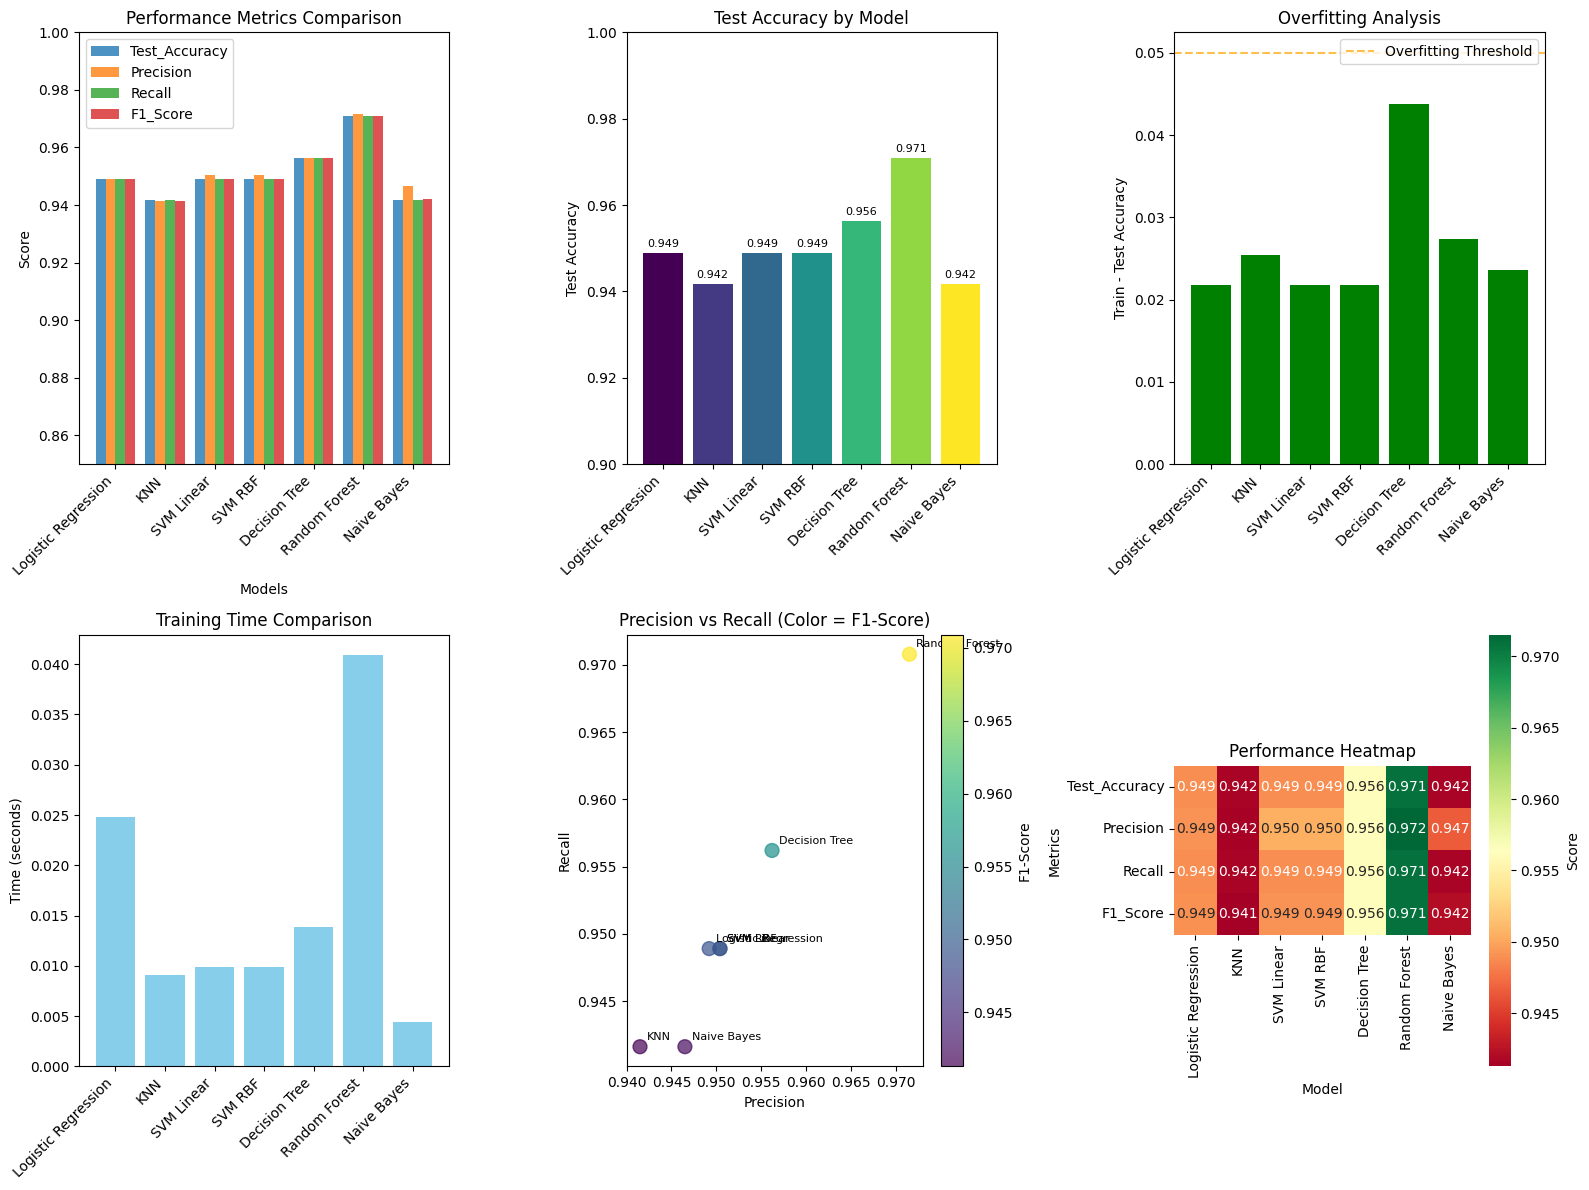

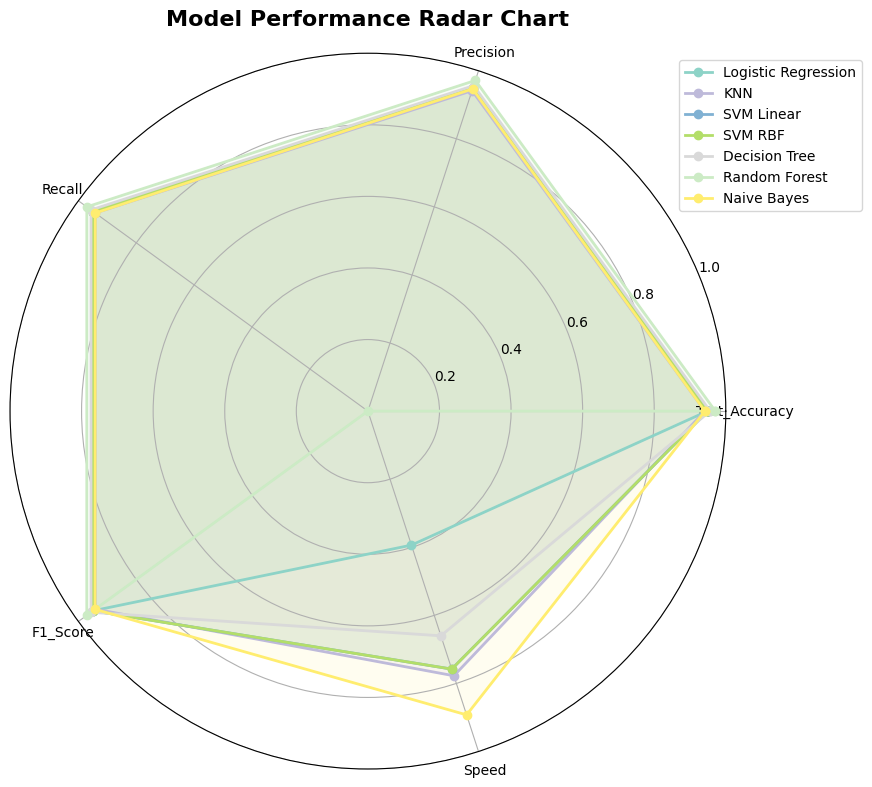

In [36]:
# Reload modules to get fixes
import importlib
import model_comparison
importlib.reload(model_comparison)
from model_comparison import create_performance_radar_chart

# Create comprehensive comparison using our module  
all_results_for_comparison = {}
for model_name, results in model_results.items():
    all_results_for_comparison[model_name] = {
        'model': all_models[model_name],
        'results': results
    }

comparison_df = create_comparison_dataframe(all_results_for_comparison)

print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 60)
display(comparison_df.round(4))

# Generate detailed analysis using our module
generate_model_summary_report(comparison_df, all_results_for_comparison)

# Create comprehensive visualizations using our module
plot_comprehensive_comparison(comparison_df, figsize=(16, 12))

# Create performance radar chart using our module
create_performance_radar_chart(comparison_df, figsize=(12, 8))

## 11. Medical Error Analysis (Type I & Type II Errors)

**Critical for Healthcare Applications:**
- **Type I Error (False Positive)**: Benign → Malignant (Unnecessary worry, additional tests)
- **Type II Error (False Negative)**: Malignant → Benign (⚠️ **DANGEROUS** - Missing cancer diagnosis)

In medical diagnosis, **Type II errors are much more dangerous** than Type I errors.

🏥 MEDICAL ERROR ANALYSIS
Type I Error: False Positive (Benign → Malignant)
Type II Error: False Negative (Malignant → Benign) ⚠️ CRITICAL


,Type_I_Error_Rate,Type_II_Error_Rate,Type_I_Count,Type_II_Count,Sensitivity,Specificity,Total_Patients
Logistic Regression,0.0460,0.06,4.0,3.0,0.94,0.9540,137.0
KNN,0.0345,0.10,3.0,5.0,0.90,0.9655,137.0
SVM Linear,0.0575,0.04,5.0,2.0,0.96,0.9425,137.0
SVM RBF,0.0575,0.04,5.0,2.0,0.96,0.9425,137.0
Decision Tree,0.0345,0.06,3.0,3.0,0.94,0.9655,137.0
Random Forest,0.0345,0.02,3.0,1.0,0.98,0.9655,137.0
Naive Bayes,0.0805,0.02,7.0,1.0,0.98,0.9195,137.0


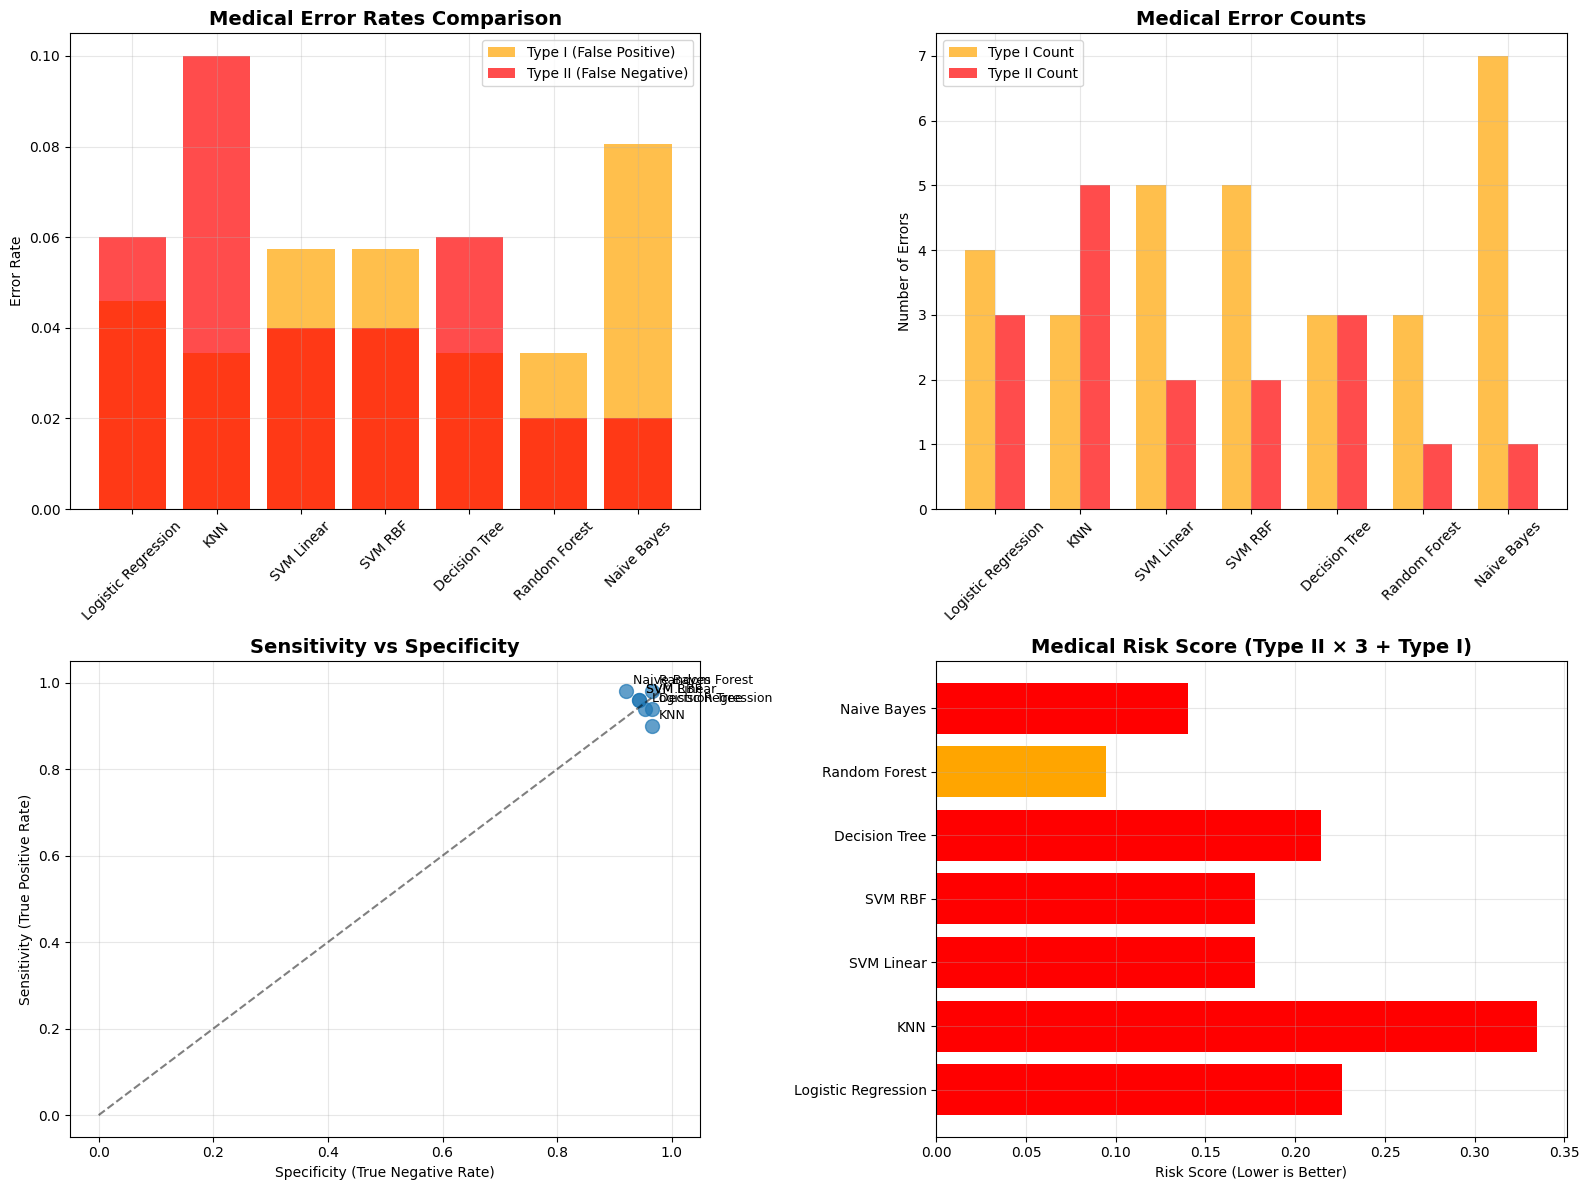


🩺 MEDICAL RECOMMENDATIONS:
🎯 Best for Cancer Detection (Highest Sensitivity): Random Forest
   Sensitivity: 0.9800
   Type II Error Rate: 0.0200

🛡️  Best for Avoiding False Alarms (Highest Specificity): KNN
   Specificity: 0.9655
   Type I Error Rate: 0.0345

⚠️  Safest Model (Lowest Type II Error): Random Forest
   Type II Error Rate: 0.0200
   Missed Cancer Cases: 1.0

🏥 MEDICAL CONCLUSION:
For cancer screening, prioritize models with:
1. Lowest Type II Error Rate (minimize missed cancers)
2. High Sensitivity (detect cancer cases)
3. Acceptable Type I Error Rate (manageable false alarms)


In [37]:
# Medical Error Analysis - Confusion Matrix Comparison
def analyze_medical_errors(model_results):
    """Analyze Type I and Type II errors for medical diagnosis"""
    error_analysis = {}
    
    for model_name, results in model_results.items():
        cm = results['confusion_matrix']
        
        # In medical context: Class 2=Benign (Negative), Class 4=Malignant (Positive)
        # CM format: [[TN, FP], [FN, TP]]
        tn, fp, fn, tp = cm.ravel()
        
        total_benign = tn + fp
        total_malignant = fn + tp
        total_predictions = tn + fp + fn + tp
        
        # Calculate error rates
        type1_error_rate = fp / total_benign if total_benign > 0 else 0  # False Positive Rate
        type2_error_rate = fn / total_malignant if total_malignant > 0 else 0  # False Negative Rate
        
        # Medical-specific metrics
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall for cancer detection
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # True negative rate
        
        error_analysis[model_name] = {
            'Type_I_Error_Rate': type1_error_rate,
            'Type_II_Error_Rate': type2_error_rate,
            'Type_I_Count': fp,
            'Type_II_Count': fn,
            'Sensitivity': sensitivity,  # Critical for cancer detection
            'Specificity': specificity,
            'Total_Patients': total_predictions
        }
    
    return error_analysis

# Perform medical error analysis
error_analysis = analyze_medical_errors(model_results)

# Create comparison DataFrame
error_df = pd.DataFrame(error_analysis).T
error_df = error_df.round(4)

print("🏥 MEDICAL ERROR ANALYSIS")
print("=" * 60)
print("Type I Error: False Positive (Benign → Malignant)")
print("Type II Error: False Negative (Malignant → Benign) ⚠️ CRITICAL")
print("=" * 60)
display(error_df)

# Visualize error comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Error Rates Comparison
axes[0,0].bar(error_df.index, error_df['Type_I_Error_Rate'], alpha=0.7, color='orange', label='Type I (False Positive)')
axes[0,0].bar(error_df.index, error_df['Type_II_Error_Rate'], alpha=0.7, color='red', label='Type II (False Negative)')
axes[0,0].set_title('Medical Error Rates Comparison', fontsize=14, weight='bold')
axes[0,0].set_ylabel('Error Rate')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Error Counts
x_pos = np.arange(len(error_df))
width = 0.35
axes[0,1].bar(x_pos - width/2, error_df['Type_I_Count'], width, label='Type I Count', color='orange', alpha=0.7)
axes[0,1].bar(x_pos + width/2, error_df['Type_II_Count'], width, label='Type II Count', color='red', alpha=0.7)
axes[0,1].set_title('Medical Error Counts', fontsize=14, weight='bold')
axes[0,1].set_ylabel('Number of Errors')
axes[0,1].set_xticks(x_pos)
axes[0,1].set_xticklabels(error_df.index, rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Sensitivity vs Specificity
axes[1,0].scatter(error_df['Specificity'], error_df['Sensitivity'], s=100, alpha=0.7)
for i, model in enumerate(error_df.index):
    axes[1,0].annotate(model, (error_df['Specificity'].iloc[i], error_df['Sensitivity'].iloc[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=9)
axes[1,0].set_xlabel('Specificity (True Negative Rate)')
axes[1,0].set_ylabel('Sensitivity (True Positive Rate)')
axes[1,0].set_title('Sensitivity vs Specificity', fontsize=14, weight='bold')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].plot([0, 1], [0, 1], 'k--', alpha=0.5)

# 4. Medical Risk Assessment
risk_scores = error_df['Type_II_Error_Rate'] * 3 + error_df['Type_I_Error_Rate']  # Weight Type II more heavily
axes[1,1].barh(error_df.index, risk_scores, color=['red' if score > 0.1 else 'orange' if score > 0.05 else 'green' for score in risk_scores])
axes[1,1].set_title('Medical Risk Score (Type II × 3 + Type I)', fontsize=14, weight='bold')
axes[1,1].set_xlabel('Risk Score (Lower is Better)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Medical recommendations
print("\n🩺 MEDICAL RECOMMENDATIONS:")
print("=" * 50)
best_sensitivity = error_df['Sensitivity'].idxmax()
best_specificity = error_df['Specificity'].idxmax()
lowest_type2 = error_df['Type_II_Error_Rate'].idxmin()

print(f"🎯 Best for Cancer Detection (Highest Sensitivity): {best_sensitivity}")
print(f"   Sensitivity: {error_df.loc[best_sensitivity, 'Sensitivity']:.4f}")
print(f"   Type II Error Rate: {error_df.loc[best_sensitivity, 'Type_II_Error_Rate']:.4f}")

print(f"\n🛡️  Best for Avoiding False Alarms (Highest Specificity): {best_specificity}")
print(f"   Specificity: {error_df.loc[best_specificity, 'Specificity']:.4f}")
print(f"   Type I Error Rate: {error_df.loc[best_specificity, 'Type_I_Error_Rate']:.4f}")

print(f"\n⚠️  Safest Model (Lowest Type II Error): {lowest_type2}")
print(f"   Type II Error Rate: {error_df.loc[lowest_type2, 'Type_II_Error_Rate']:.4f}")
print(f"   Missed Cancer Cases: {error_df.loc[lowest_type2, 'Type_II_Count']}")

print(f"\n🏥 MEDICAL CONCLUSION:")
print(f"For cancer screening, prioritize models with:")
print(f"1. Lowest Type II Error Rate (minimize missed cancers)")
print(f"2. High Sensitivity (detect cancer cases)")
print(f"3. Acceptable Type I Error Rate (manageable false alarms)")

## 12. CAP Analysis (Cumulative Accuracy Profile)

**CAP Analysis evaluates model performance in medical diagnosis:**
- **CAP Curve**: Shows cumulative true positive rate
- **Accuracy Ratio (AR)**: Measures model discrimination power
- **Medical Interpretation**: How effectively the model identifies cancer patients

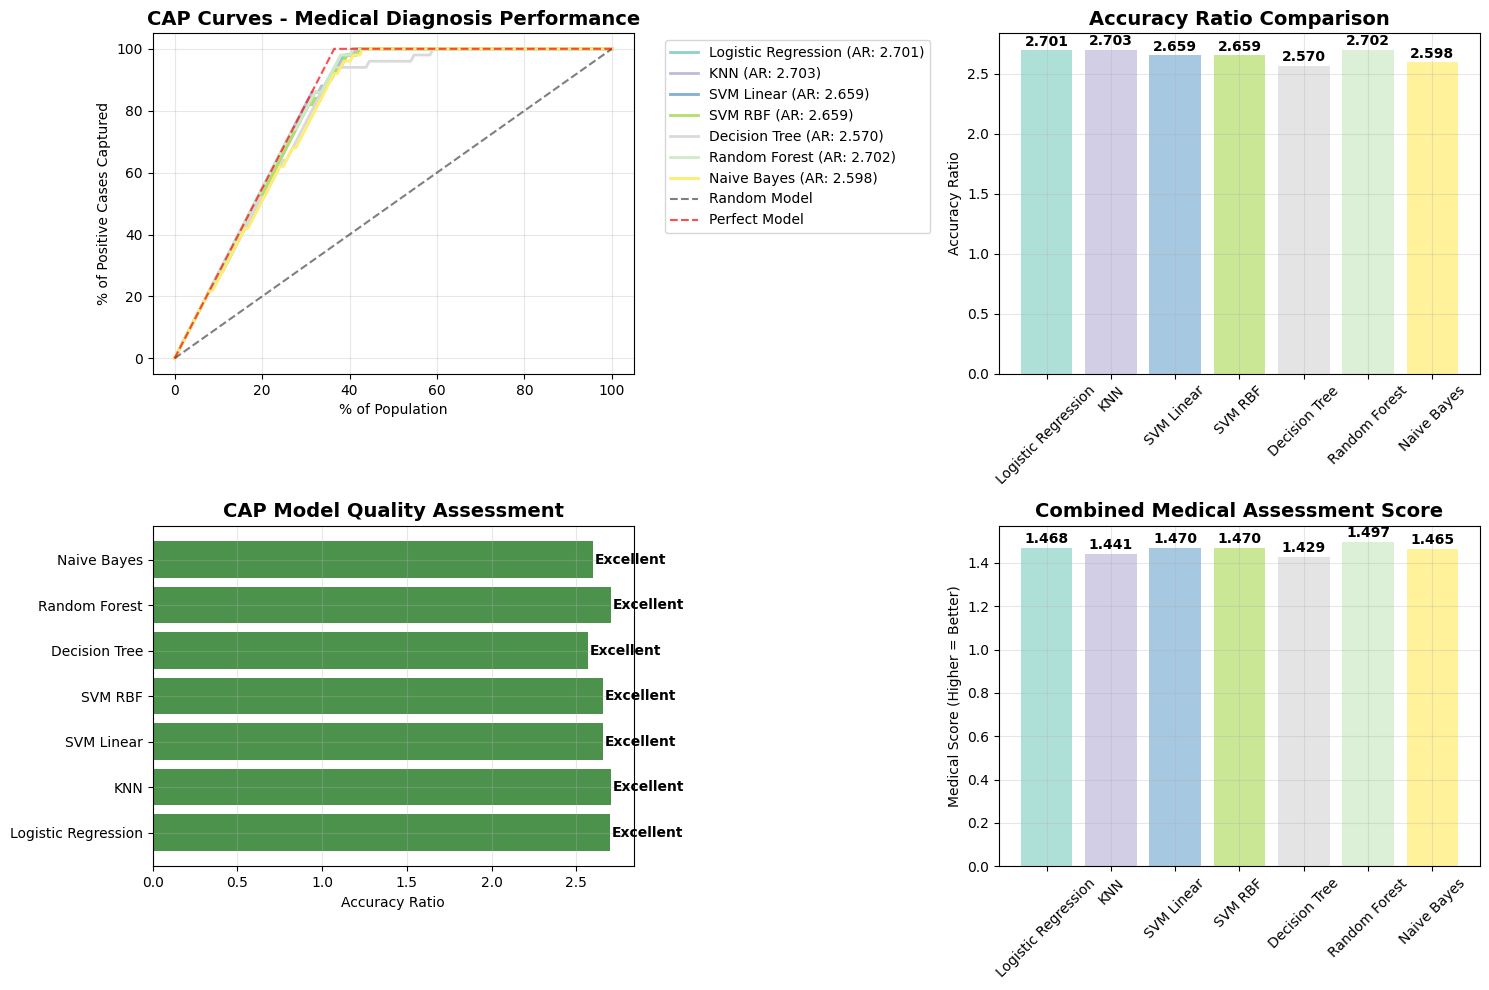


🏥 COMPREHENSIVE MEDICAL ASSESSMENT


,Accuracy_Ratio,Type_II_Error_Rate,Sensitivity,Specificity,Medical_Score
Random Forest,2.7022,0.02,0.98,0.9655,1.4967
SVM Linear,2.6594,0.04,0.96,0.9425,1.4698
SVM RBF,2.6594,0.04,0.96,0.9425,1.4698
Logistic Regression,2.7009,0.06,0.94,0.9540,1.4683
Naive Bayes,2.5976,0.02,0.98,0.9195,1.4653
KNN,2.7035,0.10,0.90,0.9655,1.4410
Decision Tree,2.5699,0.06,0.94,0.9655,1.4290



📊 CAP ANALYSIS INTERPRETATION:
Accuracy Ratio (AR) Scale:
• AR ≥ 0.9: Excellent model
• AR ≥ 0.7: Good model
• AR ≥ 0.6: Acceptable model
• AR < 0.6: Poor model

🎯 FINAL MEDICAL RECOMMENDATIONS:
🥇 Best Overall Medical Model: Random Forest
   Medical Score: 1.4967
   Accuracy Ratio: 2.7022
   Type II Error Rate: 0.0200
   Sensitivity: 0.9800

🔍 Key Medical Insights:
• Safest (Lowest Type II Error): Random Forest
• Best Cancer Detection (Highest Sensitivity): Random Forest
• Best Discrimination (Highest AR): KNN

⚠️  MEDICAL WARNING:
In cancer diagnosis, Type II errors (missing cancer) are critically dangerous.
Always prioritize models with low Type II error rates over overall accuracy!


In [38]:
# CAP Analysis Implementation
def calculate_cap_analysis(model, X_test, y_test, model_name):
    """Calculate CAP curve and Accuracy Ratio"""
    
    # Get prediction probabilities
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    elif hasattr(model, 'decision_function'):
        y_proba = model.decision_function(X_test)
        # Normalize to [0,1] range
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())
    else:
        # For models without probability, use binary predictions
        y_proba = model.predict(X_test)
    
    # Convert labels to binary (assuming 4=positive, 2=negative)
    y_binary = (y_test == 4).astype(int)
    
    # Sort by prediction probability (descending)
    sorted_indices = np.argsort(-y_proba)
    y_sorted = y_binary[sorted_indices]
    
    # Calculate cumulative true positives
    n_samples = len(y_test)
    n_positive = np.sum(y_binary)
    
    # CAP curve points
    x_cap = np.arange(0, n_samples + 1)
    y_cap = np.cumsum(np.concatenate([[0], y_sorted]))
    
    # Normalize to percentages
    x_cap_pct = x_cap / n_samples * 100
    y_cap_pct = y_cap / n_positive * 100
    
    # Calculate Accuracy Ratio (AR)
    # Area under CAP curve
    area_cap = np.trapz(y_cap_pct, x_cap_pct) / 100
    
    # Area under perfect model (triangle)
    area_perfect = 50 + (100 - (n_positive/n_samples)*100) * (n_positive/n_samples)*100 / 2 / 100
    
    # Area under random model (triangle)
    area_random = 50
    
    # Accuracy Ratio
    accuracy_ratio = (area_cap - area_random) / (area_perfect - area_random)
    
    return x_cap_pct, y_cap_pct, accuracy_ratio

# Perform CAP Analysis for all models
cap_results = {}
plt.figure(figsize=(15, 10))

# Plot setup
plt.subplot(2, 2, 1)
colors = plt.cm.Set3(np.linspace(0, 1, len(all_models)))

for i, (model_name, model) in enumerate(all_models.items()):
    x_cap, y_cap, ar = calculate_cap_analysis(model, X_test, y_test, model_name)
    cap_results[model_name] = ar
    
    plt.plot(x_cap, y_cap, label=f'{model_name} (AR: {ar:.3f})', 
             color=colors[i], linewidth=2)

# Add reference lines
plt.plot([0, 100], [0, 100], 'k--', alpha=0.5, label='Random Model')
n_positive_pct = (np.sum(y_test == 4) / len(y_test)) * 100
plt.plot([0, n_positive_pct, 100], [0, 100, 100], 'r--', alpha=0.7, label='Perfect Model')

plt.xlabel('% of Population')
plt.ylabel('% of Positive Cases Captured')
plt.title('CAP Curves - Medical Diagnosis Performance', fontsize=14, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Accuracy Ratio comparison
plt.subplot(2, 2, 2)
ar_values = list(cap_results.values())
model_names = list(cap_results.keys())

bars = plt.bar(model_names, ar_values, color=colors[:len(model_names)], alpha=0.7)
plt.title('Accuracy Ratio Comparison', fontsize=14, weight='bold')
plt.ylabel('Accuracy Ratio')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, ar_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# CAP Analysis interpretation
plt.subplot(2, 2, 3)
# Create interpretation categories
ar_interpretation = []
ar_colors = []
for ar in ar_values:
    if ar >= 0.9:
        ar_interpretation.append('Excellent')
        ar_colors.append('darkgreen')
    elif ar >= 0.7:
        ar_interpretation.append('Good')
        ar_colors.append('green')
    elif ar >= 0.6:
        ar_interpretation.append('Acceptable')
        ar_colors.append('orange')
    else:
        ar_interpretation.append('Poor')
        ar_colors.append('red')

# Plot interpretation
y_pos = np.arange(len(model_names))
bars = plt.barh(y_pos, ar_values, color=ar_colors, alpha=0.7)
plt.yticks(y_pos, model_names)
plt.xlabel('Accuracy Ratio')
plt.title('CAP Model Quality Assessment', fontsize=14, weight='bold')
plt.grid(True, alpha=0.3)

# Add interpretation text
for i, (bar, interp) in enumerate(zip(bars, ar_interpretation)):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             interp, va='center', fontweight='bold')

# Combined medical assessment
plt.subplot(2, 2, 4)
# Combine error analysis with CAP analysis
combined_scores = []
for model_name in model_names:
    type2_error = error_df.loc[model_name, 'Type_II_Error_Rate']
    sensitivity = error_df.loc[model_name, 'Sensitivity']
    ar_score = cap_results[model_name]
    
    # Medical score: Prioritize low Type II error, high sensitivity, high AR
    # Lower Type II error is better, so we use (1 - type2_error)
    medical_score = (1 - type2_error) * 0.4 + sensitivity * 0.3 + ar_score * 0.3
    combined_scores.append(medical_score)

bars = plt.bar(model_names, combined_scores, color=colors[:len(model_names)], alpha=0.7)
plt.title('Combined Medical Assessment Score', fontsize=14, weight='bold')
plt.ylabel('Medical Score (Higher = Better)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels
for bar, score in zip(bars, combined_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Create comprehensive medical assessment table
medical_assessment = pd.DataFrame({
    'Accuracy_Ratio': [cap_results[name] for name in model_names],
    'Type_II_Error_Rate': [error_df.loc[name, 'Type_II_Error_Rate'] for name in model_names],
    'Sensitivity': [error_df.loc[name, 'Sensitivity'] for name in model_names],
    'Specificity': [error_df.loc[name, 'Specificity'] for name in model_names],
    'Medical_Score': combined_scores
}, index=model_names)

medical_assessment = medical_assessment.round(4)
medical_assessment = medical_assessment.sort_values('Medical_Score', ascending=False)

print("\n🏥 COMPREHENSIVE MEDICAL ASSESSMENT")
print("=" * 70)
display(medical_assessment)

print("\n📊 CAP ANALYSIS INTERPRETATION:")
print("=" * 40)
print("Accuracy Ratio (AR) Scale:")
print("• AR ≥ 0.9: Excellent model")
print("• AR ≥ 0.7: Good model") 
print("• AR ≥ 0.6: Acceptable model")
print("• AR < 0.6: Poor model")

print(f"\n🎯 FINAL MEDICAL RECOMMENDATIONS:")
print("=" * 40)
best_model = medical_assessment.index[0]
print(f"🥇 Best Overall Medical Model: {best_model}")
print(f"   Medical Score: {medical_assessment.loc[best_model, 'Medical_Score']:.4f}")
print(f"   Accuracy Ratio: {medical_assessment.loc[best_model, 'Accuracy_Ratio']:.4f}")
print(f"   Type II Error Rate: {medical_assessment.loc[best_model, 'Type_II_Error_Rate']:.4f}")
print(f"   Sensitivity: {medical_assessment.loc[best_model, 'Sensitivity']:.4f}")

print(f"\n🔍 Key Medical Insights:")
lowest_type2 = medical_assessment['Type_II_Error_Rate'].idxmin()
highest_sens = medical_assessment['Sensitivity'].idxmax()
highest_ar = medical_assessment['Accuracy_Ratio'].idxmax()

print(f"• Safest (Lowest Type II Error): {lowest_type2}")
print(f"• Best Cancer Detection (Highest Sensitivity): {highest_sens}")
print(f"• Best Discrimination (Highest AR): {highest_ar}")

print(f"\n⚠️  MEDICAL WARNING:")
print(f"In cancer diagnosis, Type II errors (missing cancer) are critically dangerous.")
print(f"Always prioritize models with low Type II error rates over overall accuracy!")